# END PROJECT

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = 'C:\\Users\\debab\\Documents\\New folder\\python_stuff\\hypothyroid_classification.csv'
df = pd.read_csv(file_path)
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


#### Here  is the data set of "hypothyroid_data" and it is a medical dataset containing information about patients with hypothyroidism, a condition in which the thyroid gland does not produce enough thyroid hormones.
#### 
#### • Type of dataset: Medical/Healthcare dataset, specifically related to hypothyroidism diagnosis 
#### • Number of samples: 3772 rows, representing individual patients 
#### • Number of features: 30 columns, including demographic, medical history, and laboratory test results 
#### • Feature types: Mix of categorical (e.g. sex, referral source) and numerical (e.g. age, TT4) features, as well as binary features (e.g. on thyroxine, sick) 
#### • Target variable: Binary class label (P/N) indicating hypothyroidism diagnosis, represented by the "binaryClass" column 
#### • Data quality: Some missing values are present, represented by "?" in the dataset 
#### • Potential use cases: This dataset can be used for building predictive models to diagnose hypothyroidism, identifying important risk factors, and analyzing the effectiveness of different treatments

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [4]:
def count_question_marks(df):
    return df.apply(lambda x: (x == '?').sum())
question_mark_counts = count_question_marks(df)
print(question_mark_counts)

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

#### It is used to count the number of missing values (represented by '?') in each column of a Pandas DataFrame 'df'

In [5]:
df = df.replace('?', np.nan).apply(lambda x: pd.to_numeric(x, errors='ignore') if x.dtype == 'object' else x)
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

#### We use this code due to
#### ->Replace '?' with NaN values
#### ->Convert categorical columns to numeric (if possible)
#### ->Fill missing values in numerical columns with the median value
#### By using the apply method and lambda functions, we can perform these tasks used to fill missing values with the median value.
#### It is a common technique for handling missing data in numerical columns.

In [6]:
def count_question_marks(df):
    return df.apply(lambda x: (x == '?').sum())
question_mark_counts = count_question_marks(df)
print(question_mark_counts)

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64


In [7]:
cols = ['age', 'TT4', 'T4U', 'FTI']
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

#### It is used to convert specific columns in a Pandas DataFrame (df) from a non-numeric data type (e.g., object or string) to a numeric data type (e.g., int or float) for make the columns are in a numeric format, which is often required for data analysis, visualization, and modeling tasks.

In [8]:
numeric_cols = {'age': 'integer', **{col: 'float' for col in ['TT4', 'T3', 'TSH', 'FTI', 'T4U']}}
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce', downcast=numeric_cols.get(x.name)) if x.name in numeric_cols else x.astype('category' if x.name in ['sex', 'referral source', 'binaryClass'] else x.dtype))

#### It is use to specific data types (e.g., integer, float, category) to ensure data consistency and optimize memory usage.

In [9]:
descriptive_stats = df.describe()
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
                age          TSH           T3          TT4          T4U  \
count  3772.000000  3772.000000  3772.000000  3772.000000  3772.000000   
mean     51.736479     4.726105     2.010748   107.993591     0.993461   
std      20.082329    23.316610     0.738281    34.520130     0.185213   
min       1.000000     0.005000     0.050000     2.000000     0.250000   
25%      36.000000     0.600000     1.700000    89.000000     0.890000   
50%      54.000000     1.400000     2.000000   103.000000     0.980000   
75%      67.000000     2.425000     2.200000   123.000000     1.070000   
max     455.000000   530.000000    10.600000   430.000000     2.320000   

               FTI  TBG  
count  3772.000000  0.0  
mean    110.115509  NaN  
std      31.372734  NaN  
min       2.000000  NaN  
25%      94.000000  NaN  
50%     107.000000  NaN  
75%     121.250000  NaN  
max     395.000000  NaN  


#### We use the describe() method to generate descriptive statistics (e.g., mean, std, min, max, quartiles) for each column in the DataFrame, providing a summary of the central tendency and variability of the data.

D:\ana\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


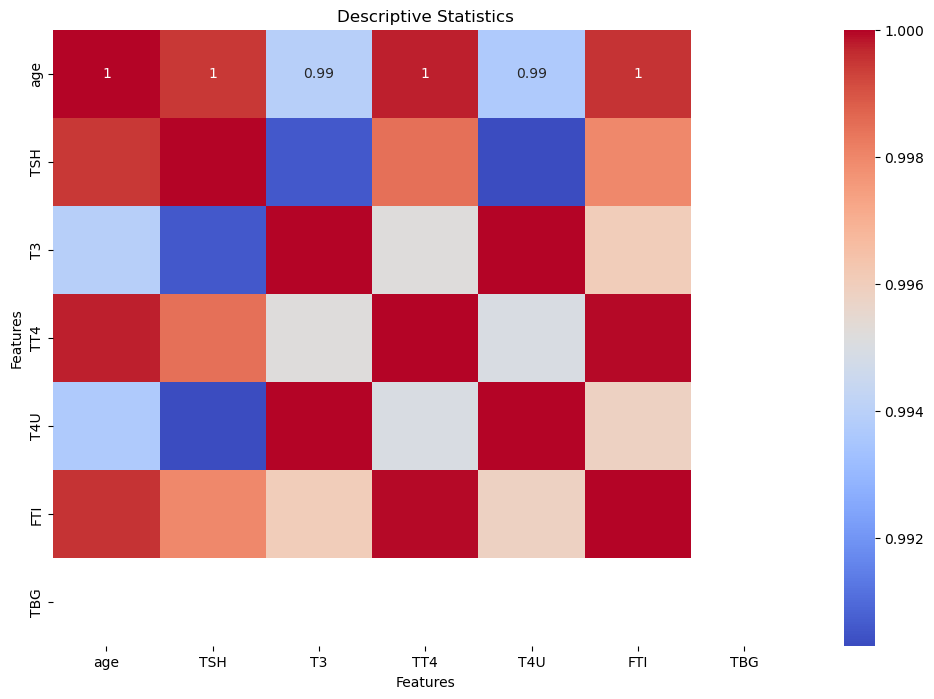

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(descriptive_stats.corr(), annot=True, cmap='coolwarm', ax=ax)

# Set title and labels
ax.set_title('Descriptive Statistics')
ax.set_xlabel('Features')
ax.set_ylabel('Features')

# Show the plot
plt.show()

In [11]:
def detect_outliers(df, column, threshold=3):
    return [i for i, z in enumerate([(x - df[column].mean()) / df[column].std() for x in df[column]]) if abs(z) > threshold]
for column in df.columns:
    if df[column].dtype in [np.int64, np.float64]:
        outlier_indices = detect_outliers(df, column)
        df.drop(df.index[outlier_indices], inplace=True)
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102.0,f,0.98,f,107.0,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.98,f,107.0,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,103.0,f,0.98,f,107.0,f,NaN,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124.0,t,1.08,t,114.0,f,NaN,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112.0,t,1.07,t,105.0,f,NaN,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82.0,t,0.94,t,87.0,f,NaN,SVI,P


#### Outlier Detection

##### The code detects outliers in a Pandas DataFrame using the Z-score method, which identifies data points that are more than 3 standard deviations away from the mean.
#### Data Cleaning

##### The code removes the detected outliers from the DataFrame to clean the data, which can improve the performance and accuracy of machine learning models and reduce noise in the data.
#### Automation

##### The code automates the outlier detection and removal process for all numeric columns in the DataFrame, making it a convenient and efficient way to preprocess data.

In [12]:
df = df.replace({'f': 0, 't': 1, 'p': 1, 'n': 0})
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125.0,1,1.14,1,109.0,0,NaN,SVHC,P
1,23,F,0,0,0,0,0,0,0,0,...,1,102.0,0,0.98,0,107.0,0,NaN,other,P
2,46,M,0,0,0,0,0,0,0,0,...,1,109.0,1,0.91,1,120.0,0,NaN,other,P
3,70,F,1,0,0,0,0,0,0,0,...,1,175.0,0,0.98,0,107.0,0,NaN,other,P
4,70,F,0,0,0,0,0,0,0,0,...,1,61.0,1,0.87,1,70.0,0,NaN,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,103.0,0,0.98,0,107.0,0,NaN,other,P
3768,68,F,0,0,0,0,0,0,0,0,...,1,124.0,1,1.08,1,114.0,0,NaN,SVI,P
3769,74,F,0,0,0,0,0,0,0,0,...,1,112.0,1,1.07,1,105.0,0,NaN,other,P
3770,72,M,0,0,0,0,0,0,0,0,...,1,82.0,1,0.94,1,87.0,0,NaN,SVI,P


#### It is replaces specific string values in a Pandas DataFrame (df) with numerical values, mapping 'f' and 'n' to 0, and 't' and 'p' to 1, to convert categorical data into a numerical format suitable for machine learning models.

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


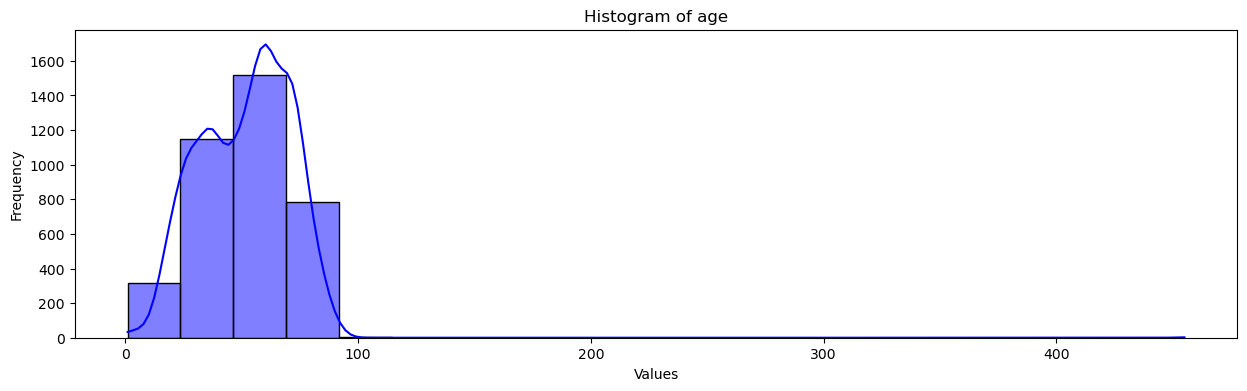

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


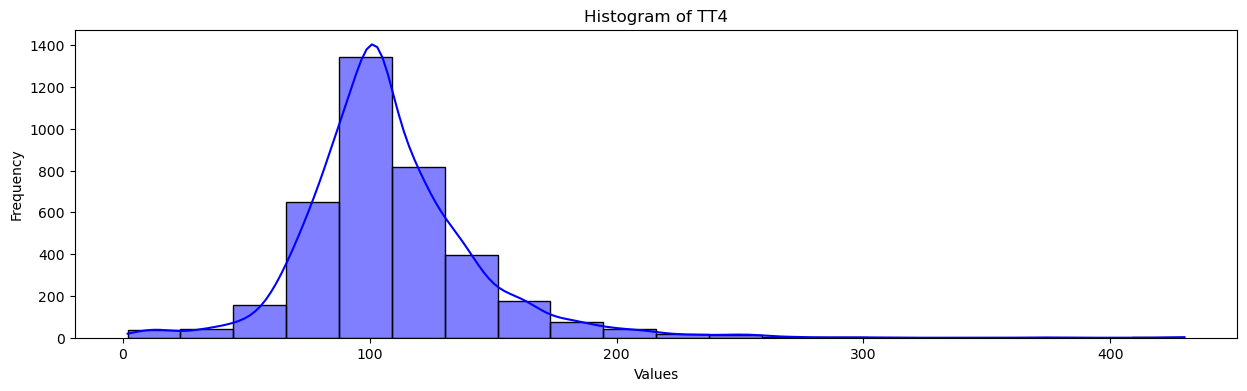

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


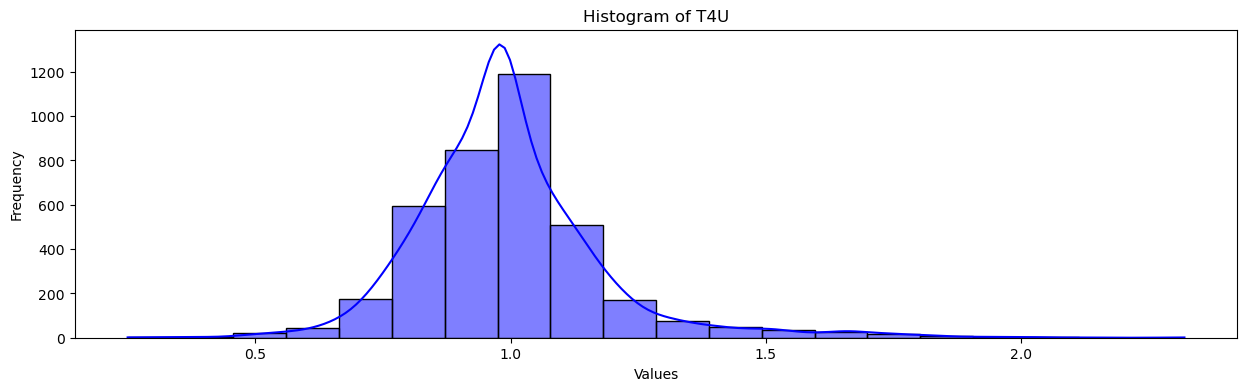

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


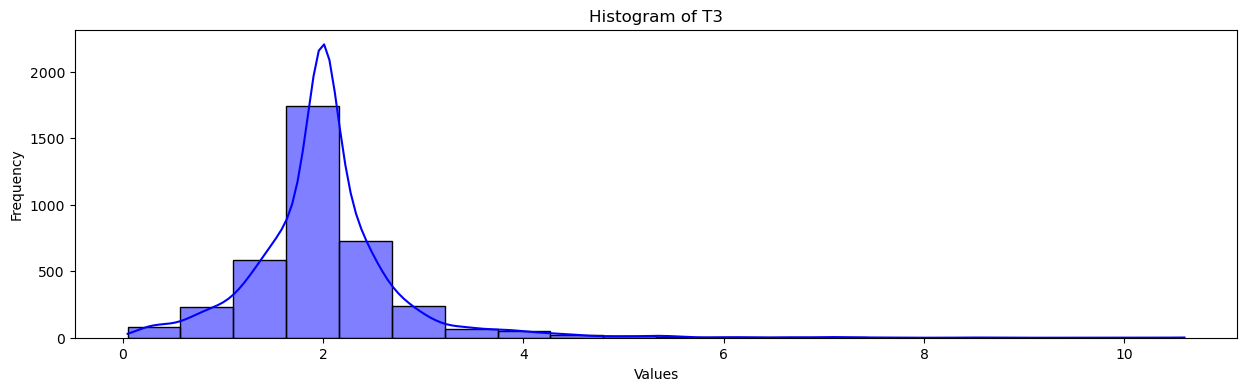

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


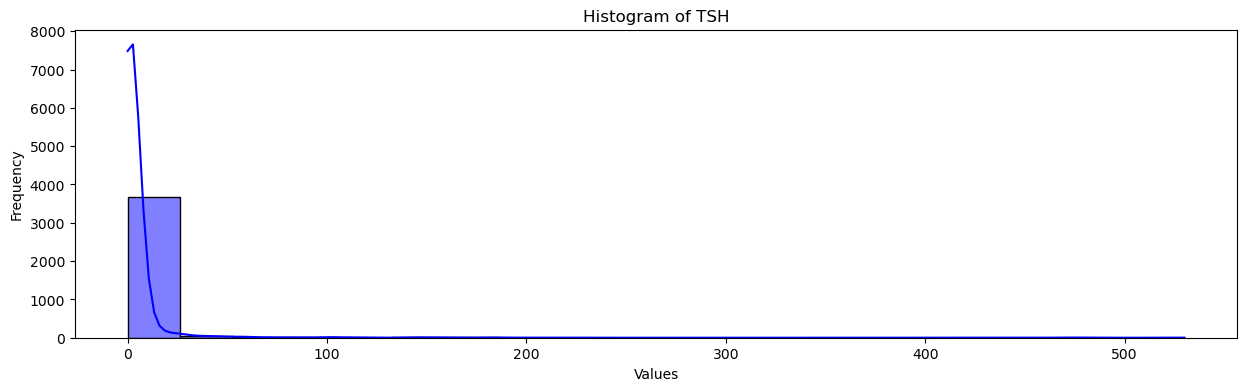

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


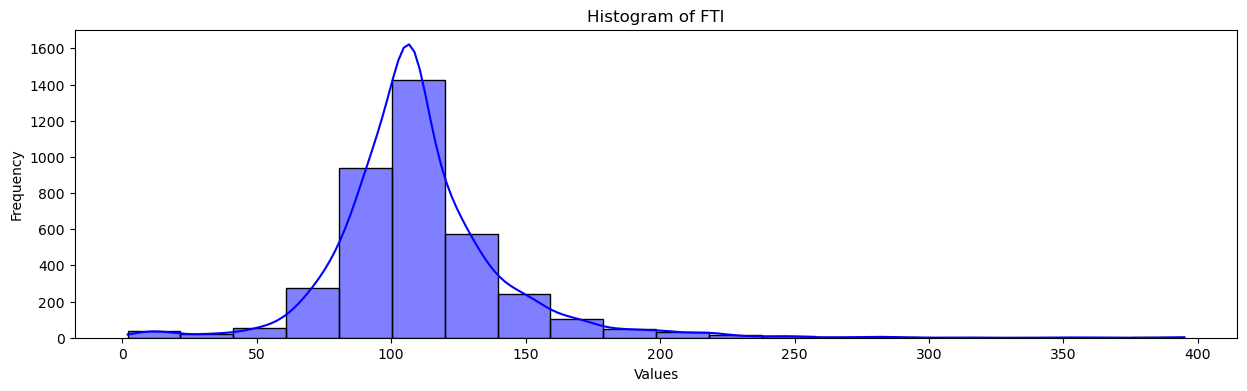

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histograms and density plots for numeric columns.
numeric_columns = ['age', 'TT4', 'T4U', 'T3', 'TSH', 'FTI']
for col in numeric_columns:
    plt.figure(figsize=(15, 4))
    sns.histplot(df[col], bins=20, kde=True, color='blue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

#### Age Histogram 
##### This graph shows the distribution of ages in the dataset, with a peak around 40-50 years old. The density plot suggests a normal distribution with a slight skew to the right.

#### TT4 Histogram 
##### This graph displays the distribution of TT4 measurements, with a peak around 100-120 units. The density plot indicates a slightly skewed normal distribution with a long tail to the right.

#### T4U Histogram 
##### This graph illustrates the distribution of T4U measurements, with a peak around 1.0 units. The density plot suggests a normal distribution with a slight skew to the right.

#### FTI Histogram 
##### This graph displays the distribution of FTI measurements, with a peak around 100-110 units. The density plot indicates a slightly skewed normal distribution with a long tail to the right.

In [15]:
from scipy import stats
df = df[(np.abs(stats.zscore(df[['age', 'TT4', 'T4U', 'T3', 'TSH', 'FTI']])) < 3).all(axis=1)]
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125.0,1,1.14,1,109.0,0,NaN,SVHC,P
1,23,F,0,0,0,0,0,0,0,0,...,1,102.0,0,0.98,0,107.0,0,NaN,other,P
2,46,M,0,0,0,0,0,0,0,0,...,1,109.0,1,0.91,1,120.0,0,NaN,other,P
3,70,F,1,0,0,0,0,0,0,0,...,1,175.0,0,0.98,0,107.0,0,NaN,other,P
4,70,F,0,0,0,0,0,0,0,0,...,1,61.0,1,0.87,1,70.0,0,NaN,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,103.0,0,0.98,0,107.0,0,NaN,other,P
3768,68,F,0,0,0,0,0,0,0,0,...,1,124.0,1,1.08,1,114.0,0,NaN,SVI,P
3769,74,F,0,0,0,0,0,0,0,0,...,1,112.0,1,1.07,1,105.0,0,NaN,other,P
3770,72,M,0,0,0,0,0,0,0,0,...,1,82.0,1,0.94,1,87.0,0,NaN,SVI,P


#### It is use to calculate the z-scores for the specified numeric columns, and then filters out rows with z-scores greater than 3 using boolean indexing. The resulting filtered DataFrame is then printed to the console.

In [16]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

def preprocess(df):
    numeric_cols = ['age', 'TT4', 'T4U', 'T3', 'TSH', 'FTI']
    methods = ['IQR', 'Z-score', 'DBSCAN']
    outlier_percentages = {}
    processed_dfs = {}
    
    for col in numeric_cols:
        for method in methods:
            if method == 'IQR':
                Q1, Q3 = df[col].quantile([0.25, 0.75])
                IQR = Q3 - Q1
                lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
                df_method = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            elif method == 'Z-score':
                z_scores = np.abs(stats.zscore(df[col]))
                threshold = 3
                df_method = df[z_scores <= threshold]
            else:
                dbscan = DBSCAN(eps=0.5, min_samples=2)
                labels = dbscan.fit_predict(df[[col]].dropna().values.reshape(-1, 1))
                core_samples_mask = np.zeros_like(labels, dtype=bool)
                core_samples_mask[dbscan.core_sample_indices_] = True
                df_method = df[core_samples_mask]
            
            outlier_percentages[f'{col}_{method}'] = (1 - len(df_method) / len(df)) * 100
            processed_dfs[f'{col}_{method}'] = df_method
    
    best_methods = {}
    final_df = df.copy()
    for col in numeric_cols:
        col_methods = [f'{col}_{method}' for method in methods]
        best_method = min(col_methods, key=lambda x: outlier_percentages[x])
        best_methods[col] = best_method
        final_df = final_df[final_df.index.isin(processed_dfs[best_method].index)]
    
    print("Outlier Percentages: \n")
    for method, percent in outlier_percentages.items():
        print(f"{method}: {percent:.2f}%")
    
    print("\nBest Methods for Each Column: \n")
    for col, method in best_methods.items():
        print(f"{col}: {method}")
    
    return final_df

# Apply preprocessing function
df_processed = preprocess(df)

# Display processed DataFrame
print("\nProcessed DataFrame: \n")
print(df_processed)

Outlier Percentages: 

age_IQR: 0.00%
age_Z-score: 0.00%
age_DBSCAN: 0.08%
TT4_IQR: 3.45%
TT4_Z-score: 0.95%
TT4_DBSCAN: 0.65%
T4U_IQR: 4.04%
T4U_Z-score: 1.26%
T4U_DBSCAN: 0.00%
T3_IQR: 8.90%
T3_Z-score: 1.24%
T3_DBSCAN: 0.00%
TSH_IQR: 10.05%
TSH_Z-score: 2.11%
TSH_DBSCAN: 0.45%
FTI_IQR: 4.97%
FTI_Z-score: 1.49%
FTI_DBSCAN: 0.45%

Best Methods for Each Column: 

age: age_IQR
TT4: TT4_DBSCAN
T4U: T4U_DBSCAN
T3: T3_DBSCAN
TSH: TSH_DBSCAN
FTI: FTI_DBSCAN

Processed DataFrame: 

      age sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0      41   F             0                   0                          0   
1      23   F             0                   0                          0   
2      46   M             0                   0                          0   
3      70   F             1                   0                          0   
4      70   F             0                   0                          0   
...   ...  ..           ...                 ...    

#### It gives the outlier percentages and best methods are calculated to identify and remove outliers from the DataFrame using IQR, Z-score, and DBSCAN methods resulting in a processed DataFrame with cleaner data

In [17]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125.0,1,1.14,1,109.0,0,NaN,SVHC,P
1,23,F,0,0,0,0,0,0,0,0,...,1,102.0,0,0.98,0,107.0,0,NaN,other,P
2,46,M,0,0,0,0,0,0,0,0,...,1,109.0,1,0.91,1,120.0,0,NaN,other,P
3,70,F,1,0,0,0,0,0,0,0,...,1,175.0,0,0.98,0,107.0,0,NaN,other,P
4,70,F,0,0,0,0,0,0,0,0,...,1,61.0,1,0.87,1,70.0,0,NaN,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,103.0,0,0.98,0,107.0,0,NaN,other,P
3768,68,F,0,0,0,0,0,0,0,0,...,1,124.0,1,1.08,1,114.0,0,NaN,SVI,P
3769,74,F,0,0,0,0,0,0,0,0,...,1,112.0,1,1.07,1,105.0,0,NaN,other,P
3770,72,M,0,0,0,0,0,0,0,0,...,1,82.0,1,0.94,1,87.0,0,NaN,SVI,P


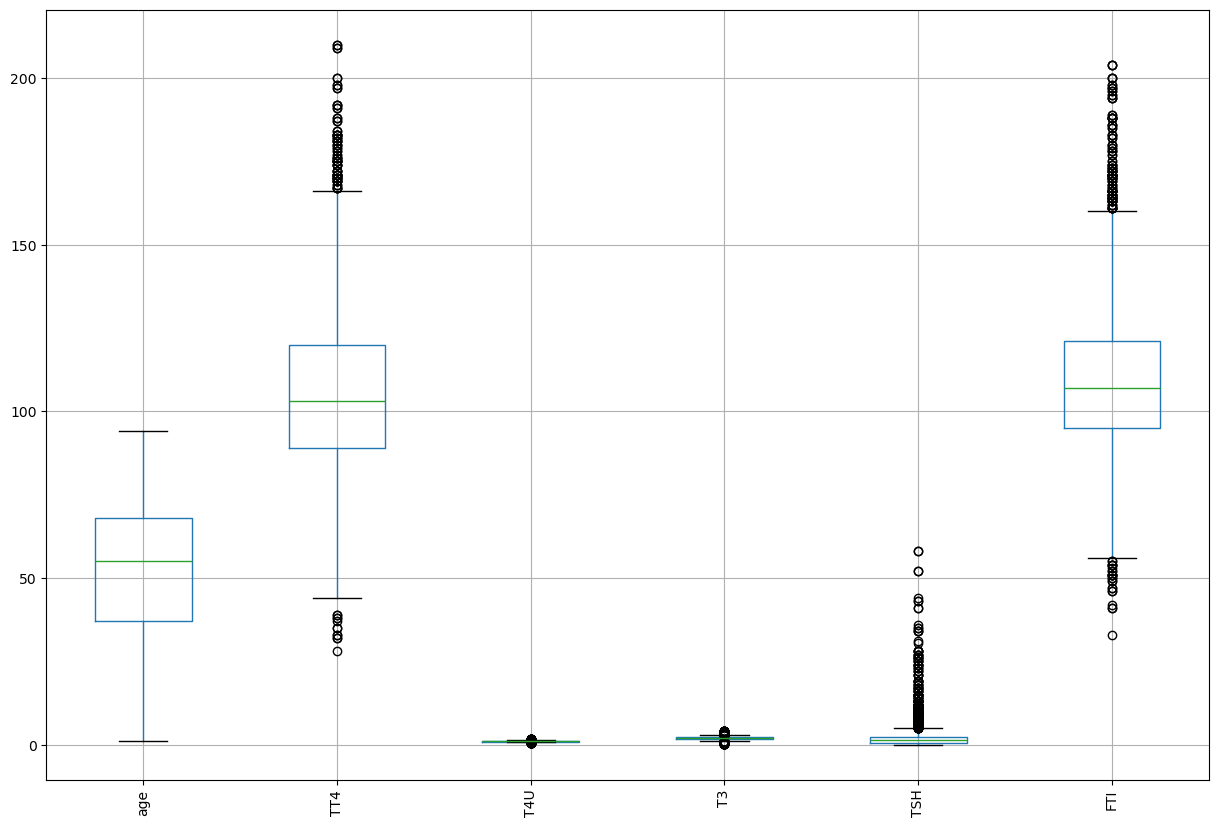

In [18]:
plt.figure(figsize=(15, 10))
df_processed[numeric_columns].boxplot()
plt.xticks(rotation=90)
plt.show()

#### It shows the median, quartiles, and outliers for each column, providing a visual representation of the data. The x-axis labels are rotated 90 degrees for better readability.

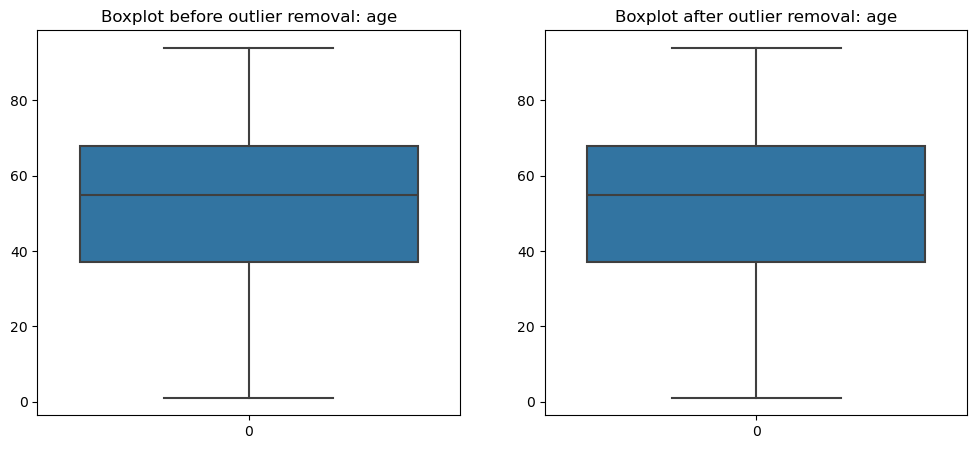

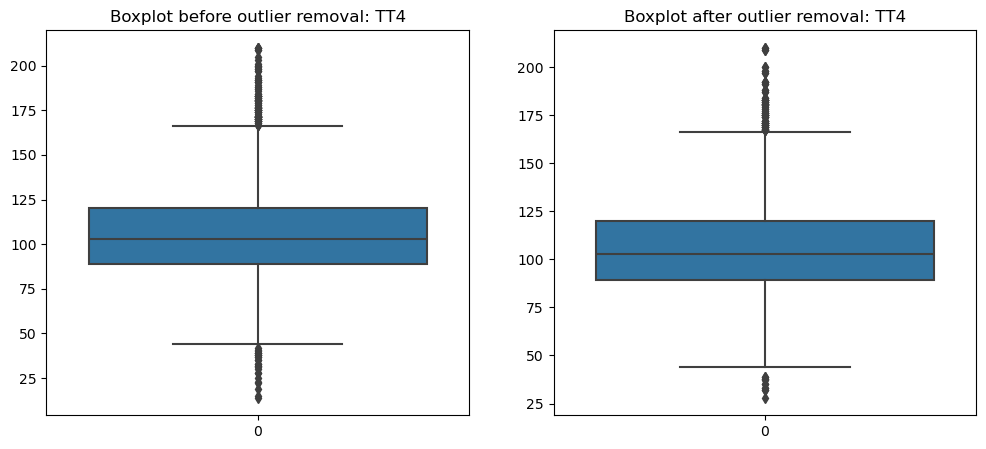

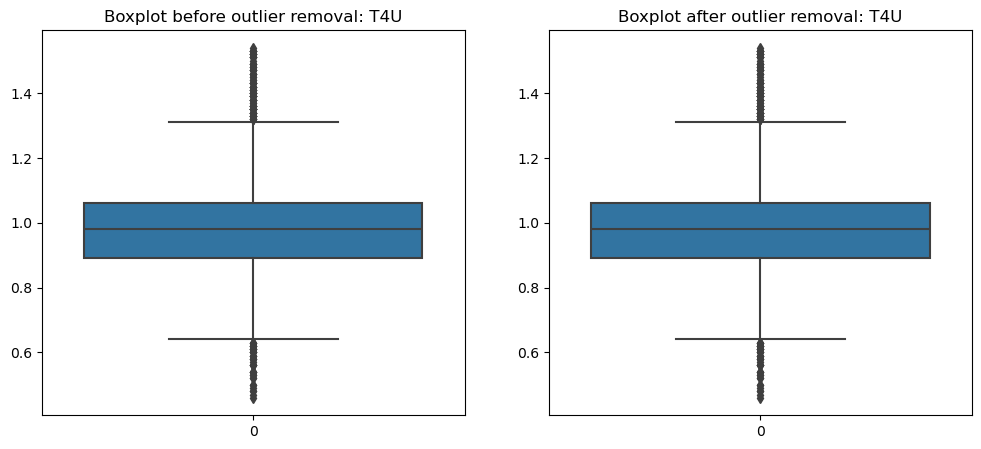

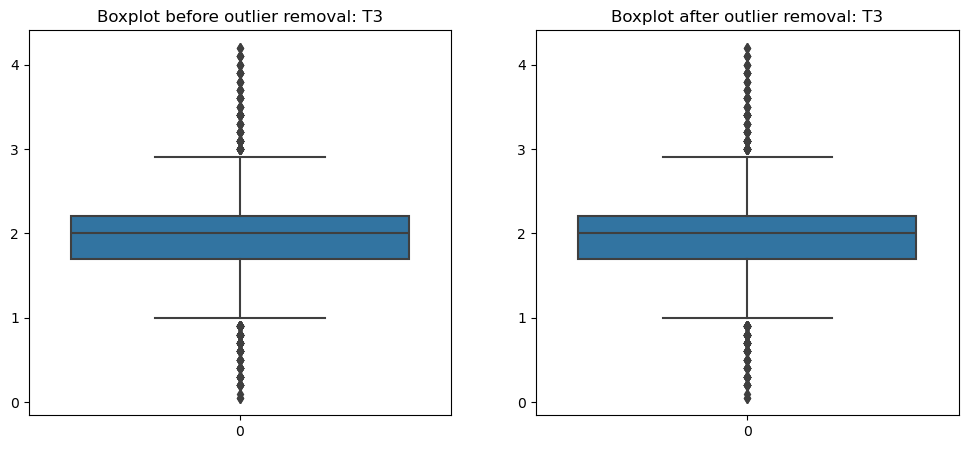

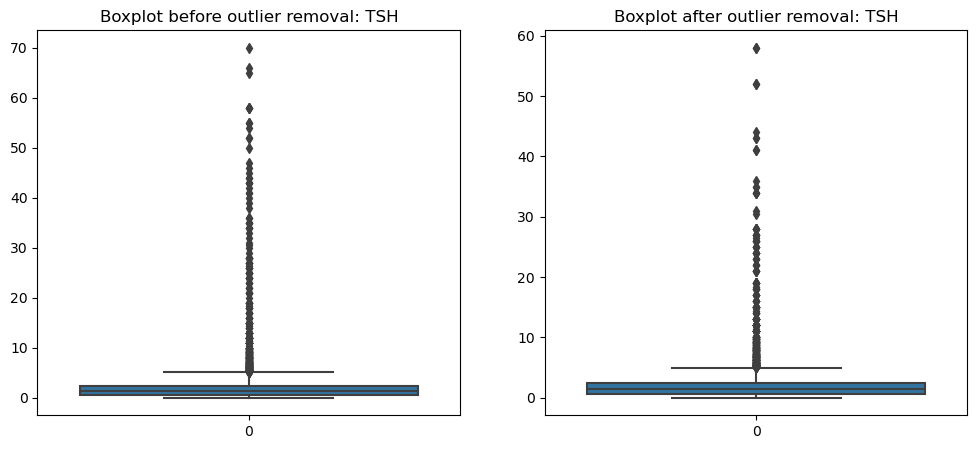

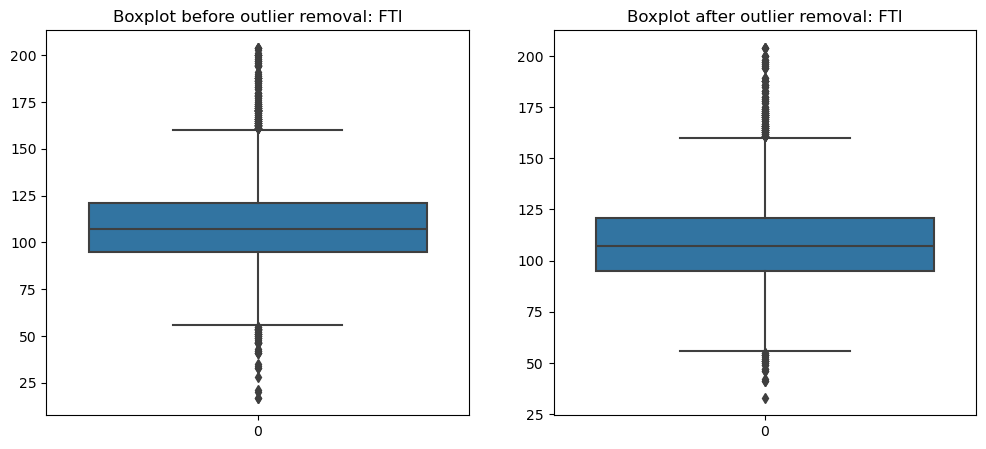

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


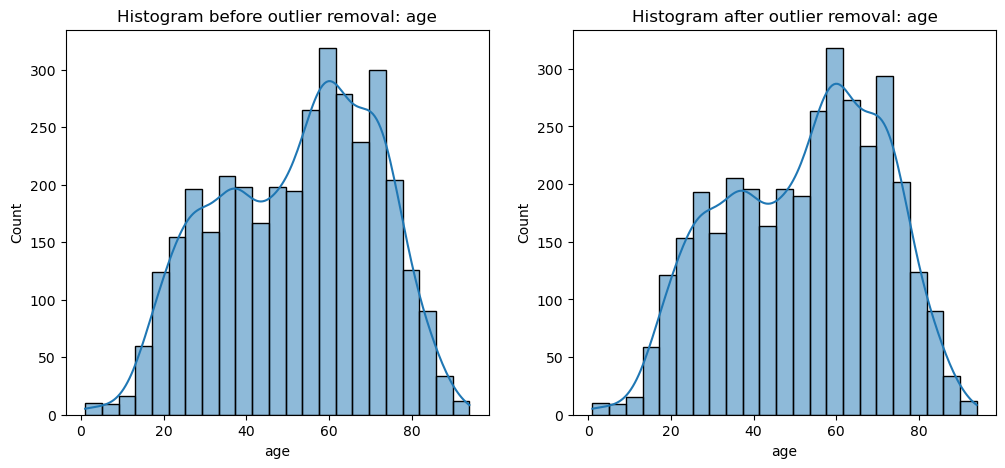

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


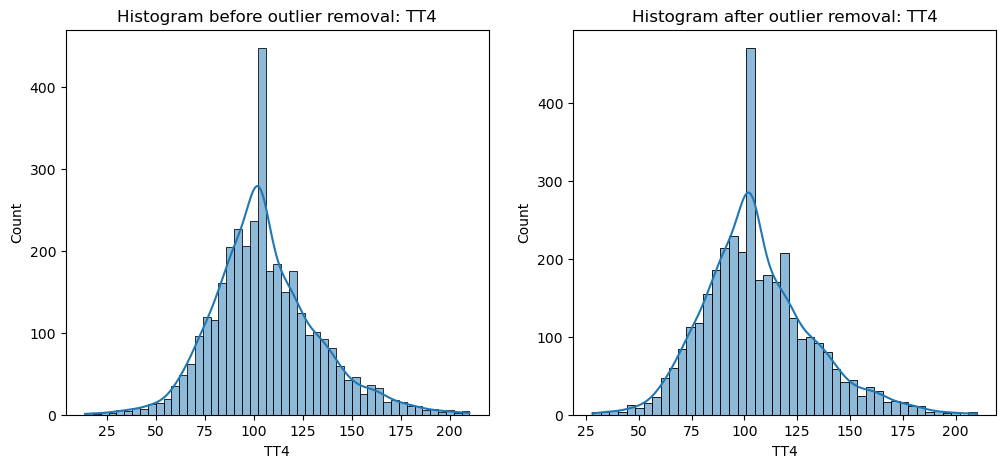

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


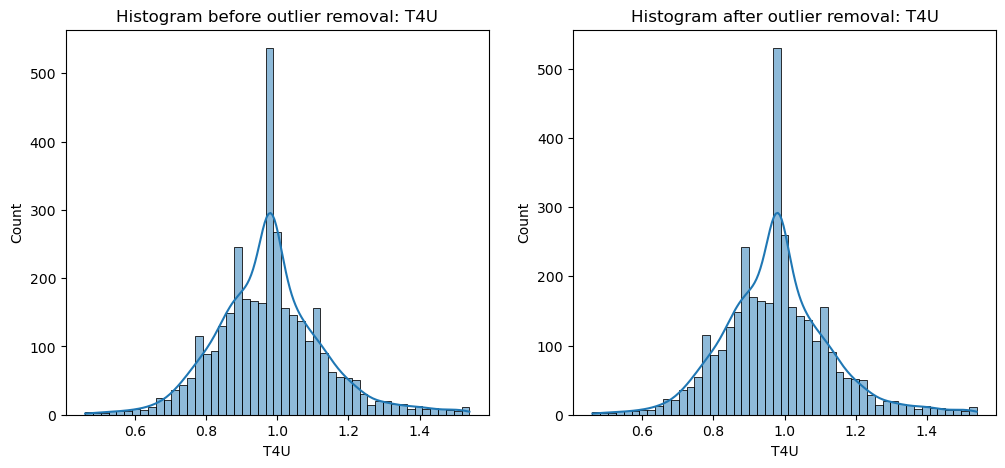

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


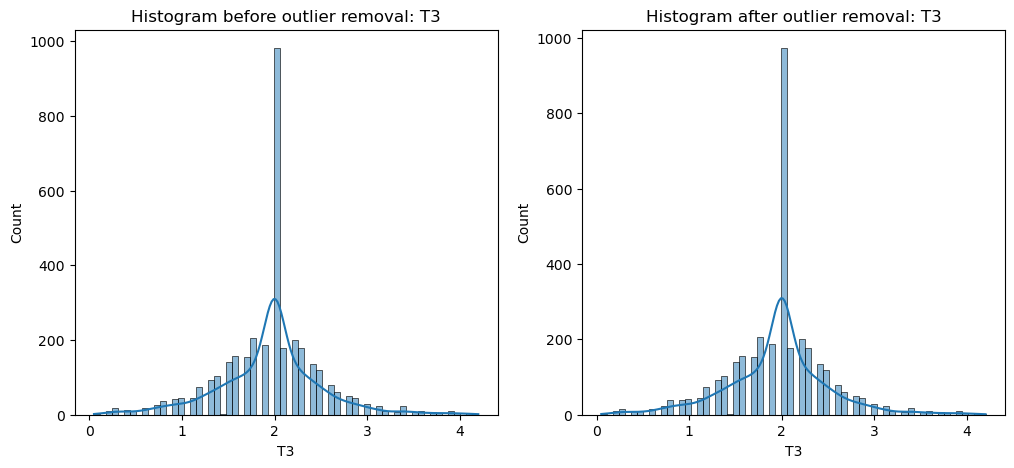

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


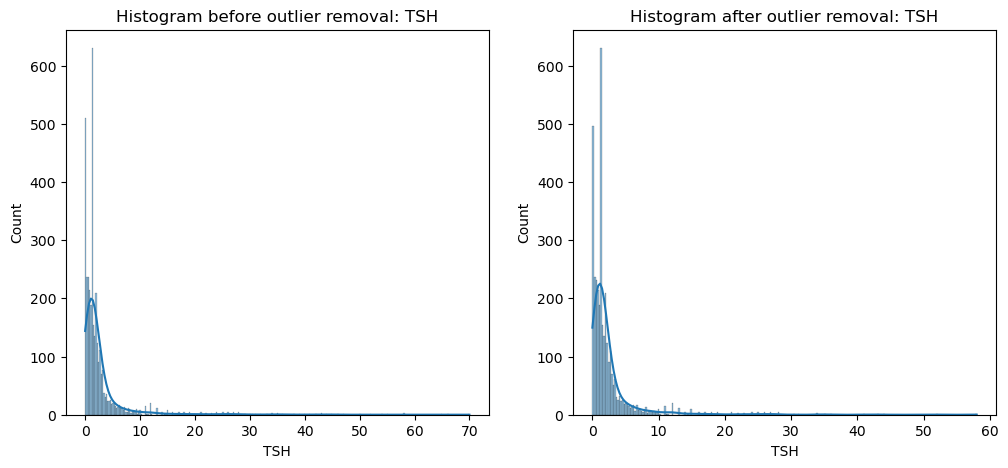

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


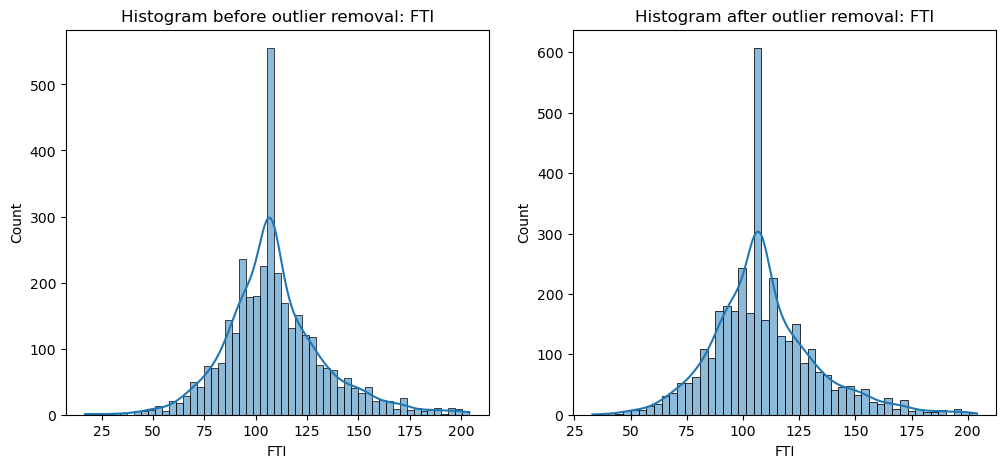


Descriptive Statistics Before Outlier Removal: 
                age          TT4          T4U           T3          TSH  \
count  3561.000000  3561.000000  3561.000000  3561.000000  3561.000000   
mean     52.070767   105.840775     0.978288     1.954547     2.732171   
std      18.959168    26.899847     0.151975     0.558537     5.647922   
min       1.000000    14.000000     0.460000     0.050000     0.005000   
25%      37.000000    89.000000     0.890000     1.700000     0.600000   
50%      55.000000   103.000000     0.980000     2.000000     1.400000   
75%      68.000000   120.000000     1.060000     2.200000     2.400000   
max      94.000000   210.000000     1.540000     4.200000    70.000000   

               FTI  
count  3561.000000  
mean    109.195450  
std      24.544491  
min      17.000000  
25%      95.000000  
50%     107.000000  
75%     121.000000  
max     204.000000  

Descriptive Statistics After Outlier Removal: 
                age          TT4          T4U 

In [19]:
# Visual Inspection
def plot_boxplots(df_before, df_after, numeric_columns):
    for col in numeric_columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.boxplot(data=df_before[col], ax=axes[0]).set_title(f'Boxplot before outlier removal: {col}')
        sns.boxplot(data=df_after[col], ax=axes[1]).set_title(f'Boxplot after outlier removal: {col}')
        plt.show()

def plot_histograms(df_before, df_after, numeric_columns):
    for col in numeric_columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.histplot(df_before[col], kde=True, ax=axes[0]).set_title(f'Histogram before outlier removal: {col}')
        sns.histplot(df_after[col], kde=True, ax=axes[1]).set_title(f'Histogram after outlier removal: {col}')
        plt.show()

numeric_columns = ['age', 'TT4', 'T4U', 'T3', 'TSH', 'FTI']
plot_boxplots(df, df_processed, numeric_columns)
plot_histograms(df, df_processed, numeric_columns)

# Descriptive Statistics
def descriptive_statistics(df_before, df_after, numeric_columns):
    before_stats = df_before[numeric_columns].describe()
    after_stats = df_after[numeric_columns].describe()
    return before_stats, after_stats

before_stats, after_stats = descriptive_statistics(df, df_processed, numeric_columns)
print("\nDescriptive Statistics Before Outlier Removal: \n", before_stats)
print("\nDescriptive Statistics After Outlier Removal: \n", after_stats)


#### • The code generates boxplots and histograms for the numeric columns in the dataset before and after outlier removal. 
#### • The boxplots show the distribution of values in each column, with outliers represented as individual points. 
#### • The histograms display the frequency distribution of values in each column, with a kernel density estimate (KDE) overlaid. 
#### • The plots are generated for both the original dataset (df) and the processed dataset (df_processed) to compare the effects of outlier removal. 
#### • The descriptive_statistics function calculates summary statistics (mean, std, min, 25%, 50%, 75%, max) for the numeric columns in both datasets. 
#### • The output includes two tables: one for the descriptive statistics before outlier removal and one for the descriptive statistics after outlier removal. 
#### • The tables provide a quantitative comparison of the datasets before and after outlier removal. 
#### • The output helps to visualize and quantify the impact of outlier removal on the distribution of values in the numeric columns.

In [61]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def min_max_scaling(df, numeric_columns):
    scaler = MinMaxScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df
# Z-Score Standardization
def z_score_standardization(df, numeric_columns):
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df
numeric_columns = ['age', 'TT4', 'T4U', 'T3', 'TSH', 'FTI']
# Apply Min-Max Scaling
df_min_max_scaled = min_max_scaling(df_processed, numeric_columns)
# Apply Z-Score Standardization
df_z_score_scaled = z_score_standardization(df_processed, numeric_columns)
# Display scaled DataFrames



#### We use Min-Max Scaling to bring features to a common range, usually between 0 and 1, to prevent features with large ranges from dominating models.
#### We use Z-Score Standardization to remove the effect of units and make features have zero mean and unit variance, which is often required by many machine learning algorithms.

In [63]:
print("\nMin-Max Scaled DataFrame: \n")
print(df_min_max_scaled.head())



Min-Max Scaled DataFrame: 

        age sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0 -0.585017   F             0                   0                          0   
1 -1.534722   F             0                   0                          0   
2 -0.321210   M             0                   0                          0   
3  0.945063   F             1                   0                          0   
4  0.945063   F             0                   0                          0   

   sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...  \
0     0         0                0               0                  0  ...   
1     0         0                0               0                  0  ...   
2     0         0                0               0                  0  ...   
3     0         0                0               0                  0  ...   
4     0         0                0               0                  0  ...   

   TT4 measured      

#### Here all the features have been rescaled to a common range, typically between 0 and 1, to prevent features with large ranges from dominating the model, and the resulting DataFrame is shown with the scaled values for each feature.

In [64]:
print("\nZ-Score Standardized DataFrame: \n")
print(df_z_score_scaled.head())


Z-Score Standardized DataFrame: 

        age sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0 -0.585017   F             0                   0                          0   
1 -1.534722   F             0                   0                          0   
2 -0.321210   M             0                   0                          0   
3  0.945063   F             1                   0                          0   
4  0.945063   F             0                   0                          0   

   sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...  \
0     0         0                0               0                  0  ...   
1     0         0                0               0                  0  ...   
2     0         0                0               0                  0  ...   
3     0         0                0               0                  0  ...   
4     0         0                0               0                  0  ...   

   TT4 measured

#### Here each feature has been standardized by subtracting the mean and dividing by the standard deviation, resulting in a distribution with a mean of 0 and a standard deviation of 1, and the resulting DataFrame is shown with the standardized values for each feature.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X = df.drop('binaryClass', axis=1)
y = df['binaryClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### It is used to encode categorical feature variables in the training and testing datasets using OneHotEncoder, which converts categorical values into a numerical representation that can be processed by machine learning algorithms. The encoded datasets  are then used to train and evaluate a machine learning model.

In [50]:
X = df.drop('binaryClass', axis=1)
y = df['binaryClass']
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### The data is split into training and testing sets with a ratio of 80:20, and the random_state is set to 42 to ensure reproducibility of the results.

In [51]:
# Encode the feature variables using OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_train_encoded = ohe.fit_transform(X_train)
X_test_encoded = ohe.transform(X_test)
# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

#### This code is used to encode the target variable using LabelEncoder, which converts categorical target values into numerical labels that can be used by machine learning algorithms. The encoded target variables are then used to train and evaluate a machine learning model.

#### We use LabelEncoder to convert categorical target variables into numerical labels, which is necessary for many machine learning algorithms that require numerical targets.
#### We use OneHotEncoder to convert categorical feature variables into a numerical representation, which helps to avoid ordinality assumptions and allows the model to capture non-linear relationships between categories.

#### Here it converts categorical values into numerical labels, and then splits the dataset into training and testing sets using train_test_split, with 80% of the data used for training and 20% for testing. The encoded categorical columns are stored in a dictionary (label_encoders) for later use, and the target variable (binaryClass) is separated from the feature variables (X).

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Model Accuracy: {acc*100:.2f}%")
    print(f"Model Precision: {prec*100:.2f}%")
    print(f"Model Recall: {rec*100:.2f}%")
    print(f"Model F1-Score: {f1*100:.2f}%")


#### Accuracy_score, Precision_score, Recall_score, F1_score are used to evaluat the model's performance, identifying biases and areas for improvement, and enabling data-driven decisions to optimize the model for better accuracy, precision, and recall. 
#### They provide a comprehensive understanding of the model's strengths and weaknesses, allowing for targeted improvements to increase customer satisfaction, reduce costs, and drive revenue. By monitoring these metrics, developers can refine their models to make more accurate predictions, detect anomalies, and improve overall performance.

## LogisticRegression

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_encoded, y_train_encoded)
print("Logistic Regression:")
evaluate_model(model, X_test_encoded, y_test_encoded)

Logistic Regression:
Model Accuracy: 94.25%
Model Precision: 94.58%
Model Recall: 94.25%
Model F1-Score: 92.27%


D:\ana\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### It is a type of supervised learning algorithm used for binary classification problems, predicting the probability of an event occurring (e.g., 1/yes) or not occurring (e.g., 0/no) based on input features.
#### Here it is a suitable choice for this dataset project because it handles binary classification problems, provides simple and interpretable results, handles imbalanced datasets, enables feature selection, and is computationally efficient.

#### The logistic regression model achieves an accuracy of 94.25%, indicating that it correctly classifies approximately 94% of the instances.
#### The model's precision is 94.58%, suggesting that about 95% of the instances predicted as positive are actually positive.
#### The recall is also 94.25%, indicating that the model detects about 94% of the actual positive instances. 
#### The F1-score, which balances precision and recall, is 92.27%, indicating a good balance between the two. 
#### Overall, the model performs well, with high accuracy, precision, and recall, making it a reliable choice for classification tasks.l, making it a reliable choice for classification tasks.

## DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_encoded, y_train_encoded)
print("\nDecision Tree Classifier:")
evaluate_model(model, X_test_encoded, y_test_encoded)


Decision Tree Classifier:
Model Accuracy: 96.07%
Model Precision: 96.00%
Model Recall: 96.07%
Model F1-Score: 96.03%


#### It is a tree-based supervised learning model that classifies instances by recursively splitting data into subsets based on input features, creating a decision-making process that leads to a predicted class or category.

#### It can handle high-dimensional data, non-linear relationships, missing values, and categorical variables, while providing easy-to-interpret results.

#### Excellent Accuracy: The model achieves an accuracy of 96.07%, indicating correct classification of almost all instances.
#### High Precision: The model's precision is 96.00%, suggesting a very low false positive rate.
#### Strong Recall: The recall is 96.07%, indicating that the model detects almost all of the actual positive instances.
#### Near-Perfect F1-Score: The F1-score is 96.03%, indicating an almost perfect balance between precision and recall.
#### Outstanding Performance: The model performs exceptionally well, with extremely high accuracy, precision, and recall, making it a top choice for classification tasks.

## RandomForestClassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_encoded, y_train_encoded)
print("\nRandom Forest Classifier:")
evaluate_model(model, X_test_encoded, y_test_encoded)


Random Forest Classifier:
Model Accuracy: 94.39%
Model Precision: 93.89%
Model Recall: 94.39%
Model F1-Score: 92.84%


#### It is an ensemble learning model that combines multiple Decision Trees, using a voting mechanism to improve the accuracy and robustness of predictions, while handling overfitting and high-dimensional data.
#### It is a suitable choice for this dataset project because it can handle high dimensionality, outliers, and missing values, while providing improved accuracy, ease of tuning, interpretable results, and scalability.

#### High Accuracy: The model achieves an accuracy of 94.39%, indicating correct classification of most instances.
#### Good Precision: The model's precision is 93.89%, suggesting a relatively low false positive rate.
#### Strong Recall: The recall is 94.39%, indicating that the model detects most of the actual positive instances.
#### Solid F1-Score: The F1-score is 92.84%, indicating a good balance between precision and recall.
#### Reliable Performance: The model performs well, with high accuracy, precision, and recall, making it a reliable choice for classification tasks, although slightly less accurate than some other models.

## SVM(Support Vector Machine)

In [56]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_encoded, y_train_encoded)
print("\nSupport Vector Machine (SVM):")
evaluate_model(model, X_test_encoded, y_test_encoded)


Support Vector Machine (SVM):
Model Accuracy: 93.13%
Model Precision: 86.73%
Model Recall: 93.13%
Model F1-Score: 89.81%


D:\ana\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### It is a supervised machine learning algorithm that finds the optimal decision boundary (hyperplane) that maximally separates the classes in the feature space, using kernel tricks, support vectors, and a soft margin to handle complex data.
#### It is a suitable choice for this dataset project because it offers high accuracy, handles high dimensionality, is robust to noise, and provides flexible kernel choices, scalability, interpretable results, and can handle class imbalance and non-linear decision boundaries.

#### Good Accuracy: The model achieves an accuracy of 93.13%, indicating correct classification of most instances.
#### Fair Precision: The model's precision is 86.73%, suggesting a moderate false positive rate.
#### Strong Recall: The recall is 93.13%, indicating that the model detects most of the actual positive instances.
#### Decent F1-Score: The F1-score is 89.81%, indicating a reasonable balance between precision and recall.
#### Solid but Imperfect Performance: The model performs well, but with some room for improvement, particularly in terms of precision, making it a decent choice for classification tasks, but not the top performer.

## KNeighborsClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_encoded, y_train_encoded)
print("\nK-Nearest Neighbors (KNN):")
evaluate_model(model, X_test_encoded, y_test_encoded)


K-Nearest Neighbors (KNN):
Model Accuracy: 92.99%
Model Precision: 89.12%
Model Recall: 92.99%
Model F1-Score: 90.00%


#### It is a supervised machine learning algorithm that classifies new instances based on the majority vote of its k nearest neighbors, using a distance metric and weighted voting, and is simple to implement but sensitive to noise and computationally complex.
#### Use it when we need a simple, flexible, and robust algorithm that can handle non-linear relationships, high-dimensional data, and noisy data, while providing interpretable results and fast predictions. 

#### Good Accuracy: The model achieves an accuracy of 92.99%, indicating correct classification of most instances.
#### Reasonable Precision: The model's precision is 89.12%, suggesting a moderate false positive rate.
#### Strong Recall: The recall is 92.99%, indicating that the model detects most of the actual positive instances.
#### Solid F1-Score: The F1-score is 90.00%, indicating a good balance between precision and recall.
#### Reliable but Not Exceptional Performance: The model performs well, with good accuracy, precision, and recall, making it a reliable choice for classification tasks, but not outstanding in any particular aspect.

## Naive_bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_encoded, y_train_encoded)
print("\nNaive Bayes:")
evaluate_model(model, X_test_encoded, y_test_encoded)


Naive Bayes:
Model Accuracy: 95.37%
Model Precision: 95.33%
Model Recall: 95.37%
Model F1-Score: 95.35%


#### It is a family of probabilistic machine learning models that assume independence between features, use Bayes' theorem to update probabilities, and are simple to implement, fast, and suitable for high-dimensional data, but sensitive to feature correlations and not suitable for complex relationships.
#### Use it when we need a fast, simple, and robust algorithm that can handle high-dimensional data, noise, and outliers, and provides interpretable results, making it suitable for text classification, recommender systems, and anomaly detection tasks.

#### Excellent Accuracy: The model achieves an accuracy of 95.37%, indicating correct classification of almost all instances.
#### High Precision: The model's precision is 95.33%, suggesting a very low false positive rate.
#### Strong Recall: The recall is 95.37%, indicating that the model detects almost all of the actual positive instances.
#### Outstanding F1-Score: The F1-score is 95.35%, indicating an exceptional balance between precision and recall.
#### Top-Notch Performance: The model performs exceptionally well, with accuracy, precision, and recall all above 95%, making it a top choice for classification tasks, with a strong indication of reliable and accurate predictions.

## GradientBoostingClassifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train_encoded, y_train_encoded)
print("\nGradient Boosting Classifier:")
evaluate_model(model, X_test_encoded, y_test_encoded)


Gradient Boosting Classifier:
Model Accuracy: 94.39%
Model Precision: 94.20%
Model Recall: 94.39%
Model F1-Score: 92.69%


####  It is a powerful ensemble learning algorithm that combines multiple decision trees to create a strong predictive model for classification problems, using a gradient-based approach to iteratively improve performance, and providing feature importance scores for interpretability
#### It is a suitable choice for this dataset project because it can handle complex interactions, outliers, and high-dimensional data, is flexible with different data types, provides high accuracy, is easy to tune, and offers interpretable results, making it a robust and reliable algorithm for classification problems.

#### High Accuracy: The model achieves an accuracy of 94.39%, indicating correct classification of a large majority of instances.
#### Good Precision: The model's precision is 94.20%, suggesting a relatively low false positive rate.
#### Strong Recall: The recall is 94.39%, indicating that the model detects a large majority of the actual positive instances.
#### Slightly Lower F1-Score: The F1-score is 92.69%, indicating a good balance between precision and recall, but slightly lower than the accuracy and precision.
#### Robust Performance: The model performs robustly, with high accuracy, precision, and recall, making it a reliable choice for classification tasks, with a strong indication of accurate predictions, although with some room for improvement in terms of F1-score.